In [2]:
from uncertainties import ufloat
from uncertainties import unumpy as unp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import THONKtools as THONK

#### Offset, Unsicherheit, Lage der Linsenmitte bei grosser Linsenfassung und Abstand zwischen rechtem Ende und Linsenmitte

In [3]:
offset=0.3
u=0.3
mlarge=3.5
rm=2

#### Einlesen von Messdaten

In [4]:
f180=pd.read_csv('measurements/1f80.txt',delimiter='\t',index_col=None)
f180150=pd.read_csv('measurements/1f80+150.txt',delimiter='\t',index_col=None)
f180200=pd.read_csv('measurements/1f80-200.txt',delimiter='\t',index_col=None)
f380200=pd.read_csv('measurements/3f80-200.txt',delimiter='\t',index_col=None)
f320080=pd.read_csv('measurements/3f-200+80.txt',delimiter='\t',index_col=None)
f4=pd.read_csv('measurements/4.txt',delimiter='\t',index_col=None)

In [5]:
f180

,xgross,xschirm,xklein
0,21.2,67.7,56.2
1,21.7,57.3,45.0
2,22.4,53.9,41.3
3,20.7,85.9,75.1
4,20.9,76.5,65.4


In [6]:
f180150

,xgross,xschirm,xklein
0,17.00,76.5,68.0
1,17.30,69.2,60.6
2,17.45,66.9,58.3
3,17.10,72.3,63.7
4,17.00,79.8,71.3


In [7]:
f180200

,xgross,xschirm,xklein
0,27.8,76.5,60.2
1,29.0,70.0,52.7
2,27.5,80.2,54.3
3,27.1,86.0,70.6
4,29.0,69.0,51.5


# ---

In [8]:
f380200

,xgross,xschirm,xklein
0,29.4,69.0,15.5
1,28.3,73.5,19.1
2,27.5,80.8,23.5
3,26.9,88.4,29.0
4,26.8,93.0,32.5
5,26.6,97.1,34.0
6,26.1,106.8,40.0
7,26.0,116.0,46.0
8,25.8,128.6,53.5
9,25.7,137.3,59.0


In [9]:
f320080

,xgross,xschirm,xklein
0,25.0,69.0,17.0
1,24.1,75.0,21.0
2,23.5,81.4,25.0
3,23.1,88.3,29.0
4,22.6,96.9,35.0
5,22.2,108.4,42.0
6,22.1,122.1,49.5
7,21.7,128.4,53.5
8,21.7,135.0,57.5
9,21.4,147.0,65.0


# ---

In [10]:
f4

,lens,distance
0,0+80,17.4
1,0+150,24.3
2,80+150,16.5
3,80-200,24.0
4,-200+80,20.1
5,250 w,36.8
6,250 b,36.4
7,250 r,36.9


### Auftragen von $\frac{1}{b}$ gegen $\frac{1}{g}$

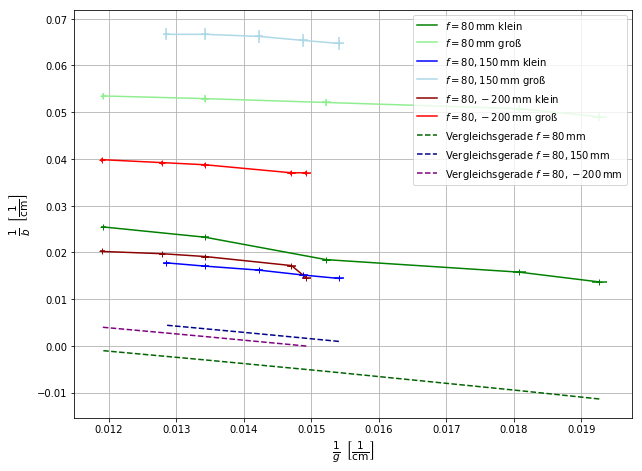

In [37]:
#maybe -9.7-offset ?

x180=[1/x for x in sorted(np.array(f180.xschirm)-rm)]
y180s=[1/x for x in sorted(np.array(f180.xklein)-rm)][::-1]
y180l=[1/x for x in sorted(np.array(f180.xgross)-rm)][::-1]
plt.plot(x180,y180s,color='green',label=r'$f=80\,\mathrm{mm\ klein}$')
plt.plot(x180,y180l,color='lightgreen',label=r'$f=80\,\mathrm{mm\ gro\ss}$')
x180e=unp.std_devs([1/x for x in unp.uarray(np.sort(f180.xschirm)-rm,u)])
y180se=unp.std_devs([1/x for x in unp.uarray(np.sort(f180.xklein)-rm,u)])
y180le=unp.std_devs([1/x for x in unp.uarray(np.sort(f180.xgross)-rm,u)])
plt.errorbar(x180,y180s,xerr=x180e,yerr=y180se,fmt='+',color='green')
plt.errorbar(x180,y180l,xerr=x180e,yerr=y180le,fmt='+',color='lightgreen')

x180150=[1/x for x in sorted(np.array(f180150.xschirm)-rm)]
y180150s=[1/x for x in sorted(np.array(f180150.xklein)-rm)][::-1]
y180150l=[1/x for x in sorted(np.array(f180150.xgross)-rm)][::-1]
plt.plot(x180150,y180150s,color='blue',label=r'$f=80,150\,\mathrm{mm\ klein}$')
plt.plot(x180150,y180150l,color='lightblue',label=r'$f=80,150\,\mathrm{mm\ gro\ss}$')
x180150e=unp.std_devs([1/x for x in unp.uarray(np.sort(f180150.xschirm)-rm,u)])
y180150se=unp.std_devs([1/x for x in unp.uarray(np.sort(f180150.xklein)-rm,u)])
y180150le=unp.std_devs([1/x for x in unp.uarray(np.sort(f180150.xgross)-rm,u)])
plt.errorbar(x180150,y180150s,xerr=x180150e,yerr=y180150se,fmt='+',color='blue')
plt.errorbar(x180150,y180150l,xerr=x180150e,yerr=y180150le,fmt='+',color='lightblue')

x180200=[1/x for x in sorted(np.array(f180200.xschirm)-rm)]
y180200s=[1/x for x in sorted(np.array(f180200.xklein)-rm)][::-1]
y180200l=[1/x for x in sorted(np.array(f180200.xgross)-rm)][::-1]
plt.plot(x180200,y180200s,color='darkred',label=r'$f=80,-200\,\mathrm{mm\ klein}$')
plt.plot(x180200,y180200l,color='red',label=r'$f=80,-200\,\mathrm{mm\ gro\ss}$')
x180200e=unp.std_devs([1/x for x in unp.uarray(np.sort(f180200.xschirm)-rm,u)])
y180200se=unp.std_devs([1/x for x in unp.uarray(np.sort(f180200.xklein)-rm,u)])
y180200le=unp.std_devs([1/x for x in unp.uarray(np.sort(f180200.xgross)-rm,u)])
plt.errorbar(x180200,y180200s,xerr=x180200e,yerr=y180200se,fmt='+',color='darkred')
plt.errorbar(x180200,y180200l,xerr=x180200e,yerr=y180200le,fmt='+',color='red')

def comp(f,g):
    return 1/f-1/(g-9.7-offset)

ycomp80=[comp(80,x) for x in sorted(np.array(f180.xschirm)-rm)]
plt.plot(x180,ycomp80,'--',color='darkgreen',label=r'Vergleichsgerade $f=80\,\mathrm{mm}$')

def comp2(f1,f2,g):
    return (1/f1+1/f2)-1/(g-9.7-offset)

ycomp80150=[comp2(80,150,x) for x in sorted(np.array(f180150.xschirm)-rm)]
plt.plot(x180150,ycomp80150,'--',color='darkblue',label=r'Vergleichsgerade $f=80,150\,\mathrm{mm}$')

ycomp80200=[comp2(80,200,x) for x in sorted(np.array(f180200.xschirm)-rm)]
plt.plot(x180200,ycomp80200,'--',color='purple',label=r'Vergleichsgerade $f=80,-200\,\mathrm{mm}$')

plt.legend()
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.xlabel(r'$\frac{1}{g}\ \left[\frac{1}{\mathrm{cm}}\right]$',size='15')
plt.ylabel(r'$\frac{1}{b}\ \left[\frac{1}{\mathrm{cm}}\right]$',size='15')
plt.rcParams["figure.figsize"]=fig_size
plt.grid()
plt.show()

## Bessel-Verfahren

In [12]:
def f(e,s):
    return (s**2-e**2)/(4*s)

In [13]:
e180=unp.uarray((f180.xklein-rm),u)-unp.uarray((f180.xgross-rm),u)
s180=unp.uarray((f180.xschirm),u)-unp.uarray([9.7],u)-ufloat(offset,u)
print(THONK.mean(f(e180,s180)))

e180150=-unp.uarray((f180150.xgross-rm),u)+unp.uarray((f180150.xklein-rm),u)
s180150=unp.uarray((f180150.xschirm),u)-unp.uarray([9.7],u)-ufloat(offset,u)
print(THONK.mean(f(e180150,s180150)))

e180200=-unp.uarray((f180200.xgross-rm),u)+unp.uarray((f180200.xklein-rm),u)
s180200=unp.uarray((f180200.xschirm),u)-unp.uarray([9.7],u)-ufloat(offset,u)
print(THONK.mean(f(e180200,s180200)))

9.08+/-0.16
6.87+/-0.19
13.14+/-0.14


In [14]:
print('\item e(80\,\mathrm{mm}): ',e180)
print('\item s(80\,\mathrm{mm}): ',s180)

print('\item e(80,150\,\mathrm{mm}): ',e180150)
print('\item s(80,150\,\mathrm{mm}): ',s180150)

print('\item e(80,-200\,\mathrm{mm}): ',e180200)
print('\item s(80,-200\,\mathrm{mm}): ',s180200)

\item e(80\,\mathrm{mm}):  [35.0+/-0.4242640687119285 23.3+/-0.4242640687119285
 18.9+/-0.4242640687119285 54.39999999999999+/-0.4242640687119285
 44.50000000000001+/-0.4242640687119285]
\item s(80\,\mathrm{mm}):  [57.7+/-0.5196152422706632 47.3+/-0.5196152422706632
 43.900000000000006+/-0.5196152422706632 75.9+/-0.5196152422706632
 66.5+/-0.5196152422706632]
\item e(80,150\,\mathrm{mm}):  [51.0+/-0.4242640687119285 43.3+/-0.4242640687119285
 40.849999999999994+/-0.4242640687119285 46.6+/-0.4242640687119285
 54.3+/-0.4242640687119285]
\item s(80,150\,\mathrm{mm}):  [66.5+/-0.5196152422706632 59.2+/-0.5196152422706632
 56.900000000000006+/-0.5196152422706632 62.3+/-0.5196152422706632
 69.8+/-0.5196152422706632]
\item e(80,-200\,\mathrm{mm}):  [32.400000000000006+/-0.4242640687119285
 23.700000000000003+/-0.4242640687119285
 26.799999999999997+/-0.4242640687119285
 43.49999999999999+/-0.4242640687119285 22.5+/-0.4242640687119285]
\item s(80,-200\,\mathrm{mm}):  [66.5+/-0.5196152422706632

In [15]:
print(8)
print(((1/8)+(1/15)-(2/(8*15)))**(-1))
print(((1/8)-(1/20)-(2/(8*-20)))**(-1))

8
5.714285714285714
11.428571428571429


## Abbe-Verfahren

In [16]:
def beta(b,g):
    return b/g

In [17]:
def p(b,g,f,h):
    return (1+1/beta(b,g))*f+h

In [18]:
f380200

,xgross,xschirm,xklein
0,29.4,69.0,15.5
1,28.3,73.5,19.1
2,27.5,80.8,23.5
3,26.9,88.4,29.0
4,26.8,93.0,32.5
5,26.6,97.1,34.0
6,26.1,106.8,40.0
7,26.0,116.0,46.0
8,25.8,128.6,53.5
9,25.7,137.3,59.0


In [19]:
f320080

,xgross,xschirm,xklein
0,25.0,69.0,17.0
1,24.1,75.0,21.0
2,23.5,81.4,25.0
3,23.1,88.3,29.0
4,22.6,96.9,35.0
5,22.2,108.4,42.0
6,22.1,122.1,49.5
7,21.7,128.4,53.5
8,21.7,135.0,57.5
9,21.4,147.0,65.0


In [20]:
g1=unp.uarray(f380200.xgross,u)-9.7+offset
g2=unp.uarray(f320080.xgross,u)-9.7+offset

b1=unp.uarray(f380200.xschirm,u)-unp.uarray(f380200.xgross,u)
b2=unp.uarray(f320080.xschirm,u)-unp.uarray(f320080.xgross,u)

B1=unp.uarray(f380200.xklein,u)*0.1
B2=unp.uarray(f320080.xklein,u)*0.1
G=0.7

In [21]:
print(b1)
print(g1)
print(b2)

[39.6+/-0.4242640687119285 45.2+/-0.4242640687119285
 53.3+/-0.4242640687119285 61.50000000000001+/-0.4242640687119285
 66.2+/-0.4242640687119285 70.5+/-0.4242640687119285
 80.69999999999999+/-0.4242640687119285 90.0+/-0.4242640687119285
 102.8+/-0.4242640687119285 111.60000000000001+/-0.4242640687119285]
[20.0+/-0.3 18.900000000000002+/-0.3 18.1+/-0.3 17.5+/-0.3
 17.400000000000002+/-0.3 17.200000000000003+/-0.3
 16.700000000000003+/-0.3 16.6+/-0.3 16.400000000000002+/-0.3 16.3+/-0.3]
[44.0+/-0.4242640687119285 50.9+/-0.4242640687119285
 57.900000000000006+/-0.4242640687119285
 65.19999999999999+/-0.4242640687119285
 74.30000000000001+/-0.4242640687119285 86.2+/-0.4242640687119285
 100.0+/-0.4242640687119285 106.7+/-0.4242640687119285
 113.3+/-0.4242640687119285 125.6+/-0.4242640687119285]


In [22]:
print(beta(B1,G))
print(beta(B2,G))

[2.2142857142857144+/-0.042857142857142864
 2.728571428571429+/-0.042857142857142864
 3.3571428571428577+/-0.042857142857142864
 4.142857142857143+/-0.042857142857142864
 4.642857142857143+/-0.042857142857142864
 4.857142857142858+/-0.042857142857142864
 5.714285714285714+/-0.042857142857142864
 6.571428571428573+/-0.042857142857142864
 7.642857142857144+/-0.042857142857142864
 8.428571428571429+/-0.042857142857142864]
[2.428571428571429+/-0.042857142857142864
 3.0000000000000004+/-0.042857142857142864
 3.5714285714285716+/-0.042857142857142864
 4.142857142857143+/-0.042857142857142864 5.0+/-0.042857142857142864
 6.000000000000001+/-0.042857142857142864
 7.071428571428572+/-0.042857142857142864
 7.642857142857144+/-0.042857142857142864
 8.214285714285715+/-0.042857142857142864
 9.285714285714286+/-0.042857142857142864]


In [23]:
print((1/8)+(1/-20)-(2/(8*-20)))
print((1/1.57)+(1/1.95)-(2/(0.57*1.95)))

0.0875
-0.6496070324431036


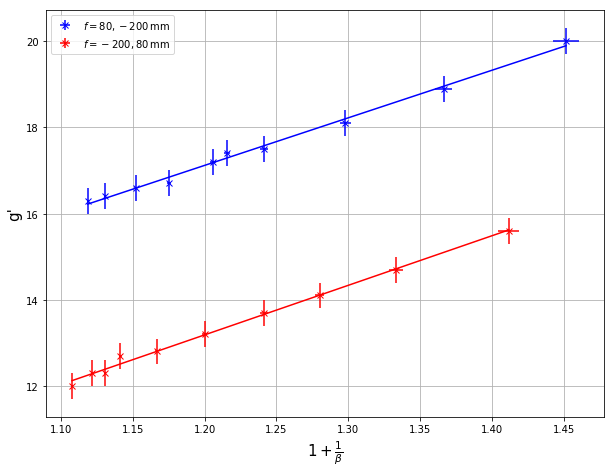

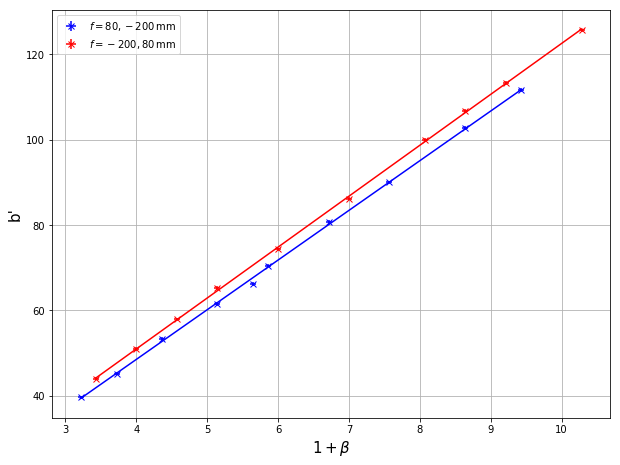

In [24]:
#plt.plot(unp.nominal_values(g1),1+1/unp.nominal_values(beta(b1,g1)),'x',label=r'$f=80,-200\,\mathrm{mm}$')
#plt.plot(unp.nominal_values(g2),1+1/unp.nominal_values(beta(b2,g2)),'x',label=r'$f=-200,80\,\mathrm{mm}$')

plt.errorbar(1+1/unp.nominal_values(beta(B1,G)),unp.nominal_values(g1),yerr=unp.std_devs(g1),xerr=unp.std_devs(1+1/beta(B1,G)),fmt='x',label=r'$f=80,-200\,\mathrm{mm}$',color='blue')
plt.errorbar(1+1/unp.nominal_values(beta(B2,G)),unp.nominal_values(g2),yerr=unp.std_devs(g2),xerr=unp.std_devs(1+1/beta(B2,G)),fmt='x',label=r'$f=-200,80\,\mathrm{mm}$',color='red')
THONK.linreg(1+1/unp.nominal_values(beta(B1,G)),unp.nominal_values(g1),grenz=False,color='blue',labelaus=None)
THONK.linreg(1+1/unp.nominal_values(beta(B2,G)),unp.nominal_values(g2),grenz=False,color='red',labelaus=None)
plt.ylabel('g\'',size='15')
plt.xlabel(r'$1+\frac{1}{\beta}$',size='15')
plt.grid()
plt.legend()
plt.savefig(fname='g.png',dpi=300)

fig=plt.figure()

ax1=fig.add_subplot(111)

ax1.errorbar(1+unp.nominal_values(beta(B1,G)),unp.nominal_values(b1),yerr=unp.std_devs(b1),xerr=unp.std_devs(1+beta(B1,G)),fmt='x',label=r'$f=80,-200\,\mathrm{mm}$',color='blue')
ax1.errorbar(1+unp.nominal_values(beta(B2,G)),unp.nominal_values(b2),yerr=unp.std_devs(b2),xerr=unp.std_devs(1+beta(B2,G)),fmt='x',label=r'$f=-200,80\,\mathrm{mm}$',color='red')
THONK.linreg(1+unp.nominal_values(beta(B1,G)),unp.nominal_values(b1),subplot=ax1,grenz=False,color='blue',labelaus=None)
THONK.linreg(1+unp.nominal_values(beta(B2,G)),unp.nominal_values(b2),subplot=ax1,grenz=False,color='red',labelaus=None)

plt.ylabel('b\'',size='15')
plt.xlabel(r'$1+\beta$',size='15')
plt.legend()
plt.grid()
plt.savefig(fname='b.png',dpi=300)
plt.show()

In [25]:
print('f_1 80 200',THONK.a(1+1/unp.nominal_values(beta(B1,G)),unp.nominal_values(g1)))
print('h_1 80 200',THONK.b(1+1/unp.nominal_values(beta(B1,G)),unp.nominal_values(g1)))
print('f_2 80 200',THONK.a(1+unp.nominal_values(beta(B1,G)),unp.nominal_values(b1)))
print('h_2 80 200',THONK.b(1+unp.nominal_values(beta(B1,G)),unp.nominal_values(b1)))

f_1 80 200 11.03475419102963
h_1 80 200 3.8762491658549783
f_2 80 200 11.639603091057374
h_2 80 200 1.9531933609241


In [26]:
print('f_1 200 80',THONK.a(1+1/unp.nominal_values(beta(B2,G)),unp.nominal_values(g2)))
print('h_1 200 80',THONK.b(1+1/unp.nominal_values(beta(B2,G)),unp.nominal_values(g2)))
print('f_2 200 80',THONK.a(1+unp.nominal_values(beta(B2,G)),unp.nominal_values(b2)))
print('h_2 200 80',THONK.b(1+unp.nominal_values(beta(B2,G)),unp.nominal_values(b2)))

f_1 200 80 11.49900273595295
h_1 200 80 -0.6138451618140085
f_2 200 80 11.930724229182056
h_2 200 80 3.2411227934990583


In [27]:
print('f1 80 200',THONK.a(1+1/unp.nominal_values(beta(B1,G)),unp.nominal_values(g1)))
print('f1 80 200',THONK.a(1+1/unp.nominal_values(beta(G,B1)),unp.nominal_values(g1)))

f1 80 200 11.03475419102963
f1 80 200 -0.5250124307761955


### Autokollimation

In [28]:
f4

,lens,distance
0,0+80,17.4
1,0+150,24.3
2,80+150,16.5
3,80-200,24.0
4,-200+80,20.1
5,250 w,36.8
6,250 b,36.4
7,250 r,36.9


In [29]:
def fd(f1,f2,d):
    return (1/f1+1/f2-d/(f1*f2))**-1
g=9.7-offset
def ak(d):
    return np.abs(d-g)

In [30]:
print('Linsensystem mit 0mm und 80mm Linsen: berechnet: 8.0, gemessen:',ak(ufloat(f4.distance[0],u)))
print('Linsensystem mit 0mm und 150mm Linsen: berechnet: 15.0, gemessen:',ak(ufloat(f4.distance[1],u)))
print('Linsensystem mit 80mm und 150mm Linsen: berechnet:',fd(8,15,2),', gemessen:',ak(ufloat(f4.distance[2],u)))
print('Linsensystem mit 80mm und -200mm Linsen: berechnet:',fd(8,-20,2),', gemessen:',ak(ufloat(f4.distance[3],u)))
print('Linsensystem mit -200mm und 80mm Linsen: berechnet:',fd(-20,8,2),', gemessen:',ak(ufloat(f4.distance[4],u)))

Linsensystem mit 0mm und 80mm Linsen: berechnet: 8.0, gemessen: 8.00+/-0.30
Linsensystem mit 0mm und 150mm Linsen: berechnet: 15.0, gemessen: 14.90+/-0.30
Linsensystem mit 80mm und 150mm Linsen: berechnet: 5.714285714285714 , gemessen: 7.10+/-0.30
Linsensystem mit 80mm und -200mm Linsen: berechnet: 11.428571428571429 , gemessen: 14.60+/-0.30
Linsensystem mit -200mm und 80mm Linsen: berechnet: 11.428571428571429 , gemessen: 10.70+/-0.30


In [36]:
nr=1.514
nb=1.530

print('Unterschied der Brechzahlen',(nb/nr))
print('Blau:',ak(ufloat(36.4,u)))
print('Rot:',ak(ufloat(36.9,u)))
print('Unterschied der Messwerte:',ak(ufloat(36.9,u))/ak(ufloat(36.4,u)))

Unterschied der Brechzahlen 1.010568031704095
Blau: 27.00+/-0.30
Rot: 27.50+/-0.30
Unterschied der Messwerte: 1.019+/-0.016
